In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from pandas import Timestamp
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sympy import *
from scipy.optimize import fsolve
from itertools import combinations
pd.set_option('display.max_rows', None)
plt.rcParams["figure.figsize"] = 15, 10

In [3]:
def logarithm_a(number):
    s = [Q[k] * np.log((delta[number + 1] - delta[k]) / (delta[number + 1] - delta[k + 1])) for k in
         range(number)]
    return sum(s)

In [5]:
def logarithm_b(band, number):
    s = [1/(4*np.pi*b_list[j]) * Q[k] * np.log((delta[number + 1] - delta[k]) / (delta[number + 1] - delta[k + 1])) 
         for j in range(band)
         for k in range(list_change[j], list_change[j + 1])]
    return sum(s)

In [6]:
def logarithm_c(band, number):
    s = [Q[k] * np.log((delta[number + 1] - delta[k]) / (delta[number + 1] - delta[k + 1])) 
         for k in range(list_change[band], number)]
    return sum(s)

In [65]:
def solution_a(list_num):
    a = Symbol('a')
    b = Symbol('b')
    w = Symbol('w')
    equation = [a - 1/(4*np.pi*b) * (logarithm_a(i - 1) + Q[i - 1] * (log(w) + np.log((delta[i] - delta[i - 1])))) - p[i]
        for i in list_num]
    print(equation[0])
    print(equation[1])
    print(equation[2]) 
    solved_value = solve([equation[0], equation[1], equation[2]], [a, b, log(w)])
    print(solved_value)
    if solved_value:
        return solved_value[0]

In [66]:
def solution_b(list_num, band):
    b = Symbol('b')
    w = Symbol('w')
    
    equation = [a - logarithm_b(band, i - 1) - 1/(4*np.pi*b) * 
                (logarithm_c(band, i - 1) + Q[i - 1] * (log(w) + np.log(2.25/200**2 * (delta[i] - delta[i - 1])))) - p[i]
        for i in list_num]
    solved_value = solve([equation[0], equation[1]], [b, w])
    if solved_value:
        return solved_value[0]

In [ ]:
list(solved_value.values())

In [40]:
def standard(df):
    df_scaled = StandardScaler().fit_transform(df)
    df_scaled = pd.DataFrame(df_scaled)
    return df_scaled

In [12]:
def plots(df_solution):
    for i in range(df_solution.shape[1]):
        plt.scatter(range(df_solution.shape[0]),
                df_solution.iloc[:, i], s=10)
        plt.grid()
        plt.show()

In [13]:
def work(name, delta_start, Q_start, date_start):
    df_full_all = pd.read_excel('D:\Python\DBscan\One.xlsx', sheet_name=name, index_col=0)
    df_all = df_full_all.iloc[:, 1:]
    date_all = df_all.index.tolist()
    
    Qж_all = np.array(df_all['Qж, м3/сут'])
    Qн_all = 1/ 0.85 * np.array(df_all['Qн, т/сут'])
    Qв_all = Qж_all - Qн_all
    Qнв_all = np.array(1.3 * Qн_all + Qв_all)
    sum_Qнв = sum(Qнв[:date_all.index(date_start)])
    
    work_time = sum_Qнв/Q_start
    delta_start[1:] = delta_start[1:] + int(work_time)
    return delta_start

In [767]:
df_full['Рзаб замер'] = np.array([p[0] - i*(p[0] - 198.450)/len(p) for i in range(len(p))])

In [244]:
with pd.ExcelWriter('D:\Python\DBscan\Solution.xlsx', mode="a", engine="openpyxl", if_sheet_exists="replace") as writer:
    df_full.to_excel(writer, sheet_name='120 (P1-2) F')

In [769]:
with pd.ExcelWriter('D:\Python\DBscan\Two.xlsx', mode="a", engine="openpyxl", if_sheet_exists="replace") as writer:
    df_full.to_excel(writer, sheet_name='120 (P1-2) F')

In [47]:
df_full = pd.read_excel('D:\Python\DBscan\Solution.xlsx', sheet_name='120 (P1-2) F', index_col=0)
df = df_full.iloc[:, 1:]

In [12]:
df_full = pd.read_excel('D:\Python\DBscan\Two.xlsx', sheet_name='5 (P1-2)', index_col=0)
df = df_full.iloc[:, 1:]

In [48]:
p = df['Рзаб замер']

Qж = np.array(df['Qж, м3/сут'])
Qн = 1/ 0.85 * np.array(df['Qн, т/сут'])
Qг = np.array(df['Qгаз, м3/сут'])
GF = np.array(df['ГФ, м3/т'])
Qгп = np.divide((Qг - Qн * 194), p)
Qгп[Qгп < 0] = 0
Qв = Qж - Qн
Qнв = np.array(1.3 * Qн + Qв)
Qнвг = np.array(Qнв + Qгп)
Q = Qнвг

date = df.index.tolist()
delta = np.array([(date[i] - date[0]).days for i in range(len(date))])

In [49]:
Qгп

2018-10-10       0.000000
2018-10-13       0.000000
2018-10-14       0.000000
2018-10-15       0.000000
2018-10-19       0.000000
2018-10-20       0.000000
2018-10-21       0.000000
2018-10-22       0.000000
2018-10-27     244.072334
2018-10-30     244.078435
2018-10-31     238.120196
2018-11-05     244.633165
2018-11-06     244.662383
2018-11-07     244.689173
2018-11-08     244.726933
2018-11-09     244.761048
2018-11-26     123.740465
2018-11-27     123.751566
2018-11-28     100.768122
2018-11-29     100.768122
2018-12-06     129.431888
2018-12-07     129.444157
2018-12-08     126.756969
2018-12-09     126.766455
2018-12-10     126.815808
2018-12-11     145.941137
2018-12-12     144.700216
2018-12-13     144.700216
2018-12-14     144.437794
2018-12-15     144.640294
2018-12-16     144.665556
2018-12-17     144.683581
2018-12-18     144.698747
2018-12-19     144.718972
2018-12-23     143.226612
2018-12-24     143.225896
2018-12-25     143.233768
2018-12-26     143.242356
2018-12-27  

In [50]:
delta = work('120 (P1-2)', delta, Qнв[0], date[0])

In [51]:
delta

array([  0, 259, 260, 261, 265, 266, 267, 268, 273, 276, 277, 282, 283,
       284, 285, 286, 303, 304, 305, 306, 313, 314, 315, 316, 317, 318,
       319, 320, 321, 322, 323, 324, 325, 326, 330, 331, 332, 333, 334,
       335, 336, 337, 338, 339, 340, 341, 344, 345, 346, 347, 348, 349,
       350, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365,
       366, 367, 368, 369, 370, 371, 372, 390, 391, 392, 393, 394, 395,
       396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408,
       409, 410, 411, 412, 413, 414, 415, 416, 417, 422, 423, 424, 425,
       426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438,
       439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451,
       452, 453, 454, 457, 458, 459, 460, 461, 462, 463, 464, 465, 479,
       480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492,
       493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505,
       506, 507, 508, 509])

In [53]:
p

2018-10-10    201.596
2018-10-13    201.574
2018-10-14    201.574
2018-10-15    201.355
2018-10-19    201.387
2018-10-20    201.387
2018-10-21    201.387
2018-10-22    201.387
2018-10-27    201.239
2018-10-30    201.131
2018-10-31    201.077
2018-11-05    200.964
2018-11-06    200.940
2018-11-07    200.918
2018-11-08    200.887
2018-11-09    200.859
2018-11-26    200.669
2018-11-27    200.651
2018-11-28    200.635
2018-11-29    200.635
2018-12-06    200.474
2018-12-07    200.455
2018-12-08    200.444
2018-12-09    200.429
2018-12-10    200.351
2018-12-11    200.370
2018-12-12    200.347
2018-12-13    200.347
2018-12-14    200.711
2018-12-15    200.430
2018-12-16    200.395
2018-12-17    200.367
2018-12-18    200.346
2018-12-19    200.318
2018-12-23    200.151
2018-12-24    200.152
2018-12-25    200.141
2018-12-26    200.129
2018-12-27    200.129
2018-12-28    200.129
2018-12-29    200.129
2018-12-30    200.129
2018-12-31    200.129
2019-01-01    199.924
2019-01-02    199.893
2019-01-03

In [58]:
list_combinations = list(combinations(range(1, 6), 3)) 
list_combinations = [list(x) for x in list_combinations]
random.shuffle(list_combinations)
list_solution = []
n = int(input())
N = min(n, len(list_combinations))
print(N)
for j in range(N):
    list_solution.append(solution_a(list_combinations[j]))
list_solution = np.array(list(filter(lambda item: item is not None, list_solution)))

10
10
a - 201.355 - 0.0795774715459477*(171.137447058824*log(w) + 952.297816615931)/b
a - 201.387 - 0.0795774715459477*(171.137447058824*log(w) + 954.900717697256)/b
a - 201.387 - 0.0795774715459477*(170.591058823529*log(w) + 955.545303947265)/b
[(187.165387401018, -6.47288396050177, 1.17972205177694)]
a - 201.574 - 0.0795774715459477*(171.137447058824*log(w) + 951.640858238892)/b
a - 201.355 - 0.0795774715459477*(171.137447058824*log(w) + 952.297816615931)/b
a - 201.387 - 0.0795774715459477*(171.137447058824*log(w) + 954.900717697256)/b
[]
a - 201.574 - 0.0795774715459477*(171.137447058824*log(w) + 950.98136822409)/b
a - 201.574 - 0.0795774715459477*(171.137447058824*log(w) + 951.640858238892)/b
a - 201.387 - 0.0795774715459477*(170.591058823529*log(w) + 955.545303947265)/b
[]
a - 201.574 - 0.0795774715459477*(171.137447058824*log(w) + 950.98136822409)/b
a - 201.574 - 0.0795774715459477*(171.137447058824*log(w) + 951.640858238892)/b
a - 201.355 - 0.0795774715459477*(171.137447058824*l

In [57]:
df_solution = pd.DataFrame(list_solution)
df_solution = df_solution[(df_solution.iloc[:, 0] > 0) & (df_solution.iloc[:, 1] > 0) & (df_solution.iloc[:, 2] != log('w'))]

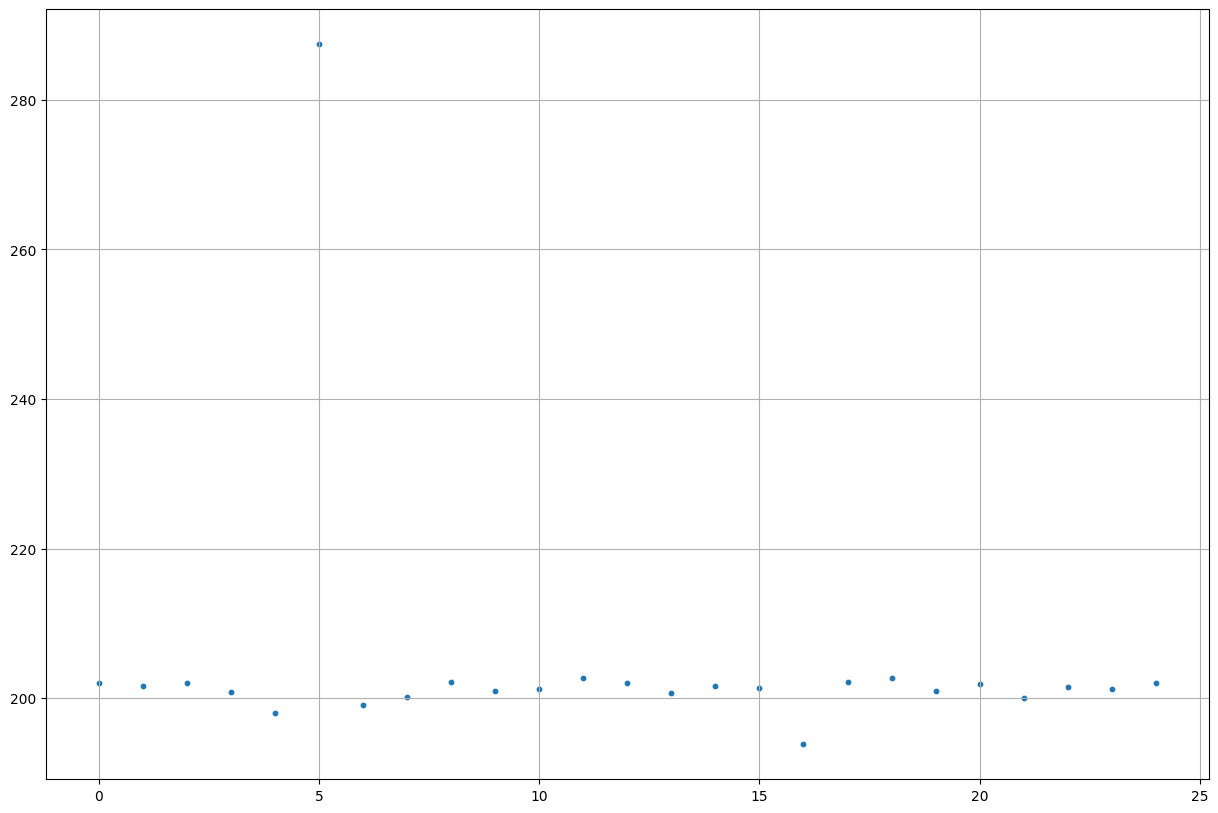

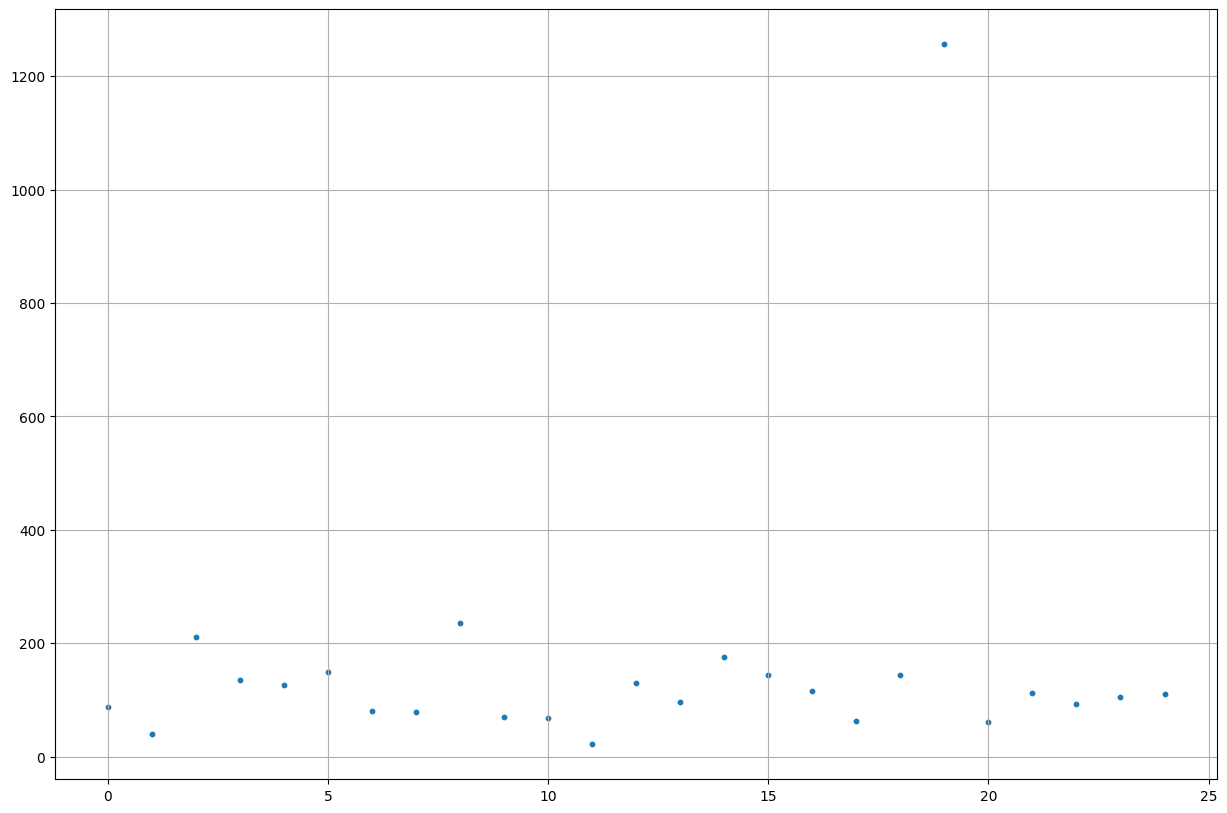

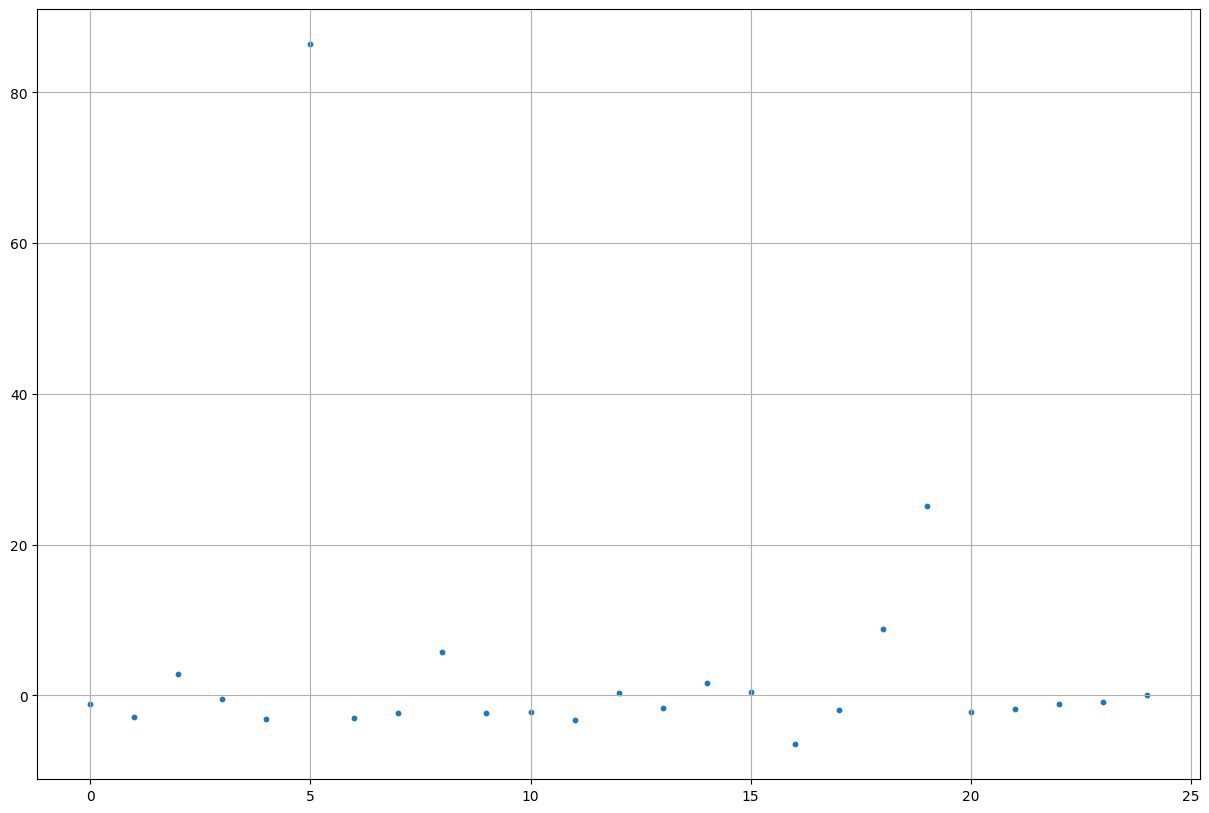

In [58]:
plots(df_solution)

In [59]:
df_solution['Cluster'] = IsolationForest(n_estimators=1000, contamination=0.5).fit_predict(standard(df_solution))
df_solution = df_solution[df_solution['Cluster'] == 1]
df_solution.pop('Cluster')

0     1
3     1
7     1
9     1
10    1
13    1
14    1
19    1
23    1
24    1
26    1
28    1
29    1
Name: Cluster, dtype: int32

In [60]:
df_solution.mean()

0    201.290766
1     93.010295
2     -1.398067
dtype: float64

In [29]:
a = 203

In [27]:
df['ГФ, м3/т']

2018-10-10     197.700
2018-10-13     197.700
2018-10-14     197.700
2018-10-15     197.700
2018-10-19     200.700
2018-10-20     197.300
2018-10-21     197.300
2018-10-22     197.300
2018-10-27     654.479
2018-10-30     653.800
2018-10-31     643.300
2018-11-05     655.800
2018-11-06     655.800
2018-11-07     655.800
2018-11-08     655.800
2018-11-09     655.800
2018-11-26     481.060
2018-11-27     481.060
2018-11-28     435.089
2018-11-29     435.089
2018-12-06     492.974
2018-12-07     492.974
2018-12-08     489.527
2018-12-09     489.527
2018-12-10     489.527
2018-12-11     525.804
2018-12-12     519.962
2018-12-13     519.962
2018-12-14     519.962
2018-12-15     519.962
2018-12-16     519.962
2018-12-17     519.958
2018-12-18     519.958
2018-12-19     519.958
2018-12-23     519.950
2018-12-24     519.950
2018-12-25     519.950
2018-12-26     519.950
2018-12-27     519.950
2018-12-28     519.950
2018-12-29     519.950
2018-12-30     519.950
2018-12-31     519.950
2019-01-01 

In [64]:
period = np.array([str(date[i])[:10] for i in list_change])
period = (period[:-1], period[1:])

In [65]:
period_df = pd.DataFrame({"Начало периода": period[0],"Конец периода":period[1], "ГФ, м³/т": gf_list, "Qнв, м³/сут": qнв_list, "kh/μ,\n м³/(атм∙сут)": b_list})
period_df

,Начало периода,Конец периода,"ГФ, м³/т","Qнв, м³/сут","kh/μ,\n м³/(атм∙сут)"
0,2018-10-10,2018-10-27,197.925000,171.098425,1.897523
1,2018-10-27,2018-11-26,653.822375,192.526079,4.912766
2,2018-11-26,2019-01-01,505.624630,168.763183,3.543193
3,2019-01-01,2019-01-16,944.154500,220.269038,7.650786
4,2019-01-16,2019-02-21,1390.457316,232.401614,11.213705
5,2019-02-21,2019-03-09,1736.023375,360.614718,20.766323
6,2019-03-09,2019-03-25,1695.176000,362.299412,20.656085
7,2019-03-25,2019-04-06,2163.837000,294.550494,22.533428
8,2019-04-06,2019-04-19,2063.194000,297.309047,21.448995
9,2019-04-19,2019-05-21,2098.895176,286.257508,21.927525


In [66]:
with pd.ExcelWriter('D:\Python\DBscan\Period.xlsx', mode="a", engine="openpyxl", if_sheet_exists="replace") as writer:
    period_df.to_excel(writer, sheet_name='120 (P1-2) F3')

In [28]:
date.index(Timestamp('2018-10-22 00:00:00'))

7

In [42]:
change = np.array(df['ГФ, м3/т'])
list_change = np.hstack([0, np.where(abs(change[:-1] - change[1:]) > 36)[0] + 1, df.shape[0] - 1])
list_change = [  0,   8,  16, 43,  53,  72,  88, 100, 112, 125, 142, 172]

In [43]:
gf_list = []
for i in range(len(list_change) - 1):
    left = list_change[i]
    right = list_change[i + 1]
    gf_list.append(GF[left:right].mean())
gf_list

[197.925,
 653.822375,
 505.6246296296297,
 944.1545,
 1390.457315789474,
 1736.0233749999998,
 1695.1759999999997,
 2163.837,
 2063.194,
 2098.8951764705885,
 1065.4919999999995]

In [44]:
qнв_list = []
for i in range(len(list_change) - 1):
    left = list_change[i]
    right = list_change[i + 1]
    qнв_list.append(Qнв[left:right].mean())

In [45]:
q_list = []
for i in range(len(list_change) - 1):
    left = list_change[i]
    right = list_change[i + 1]
    q_list.append(Q[left:right].mean())

28


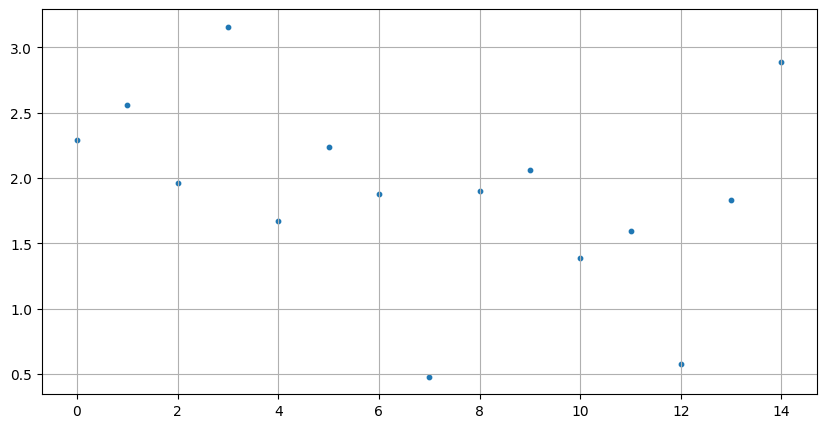

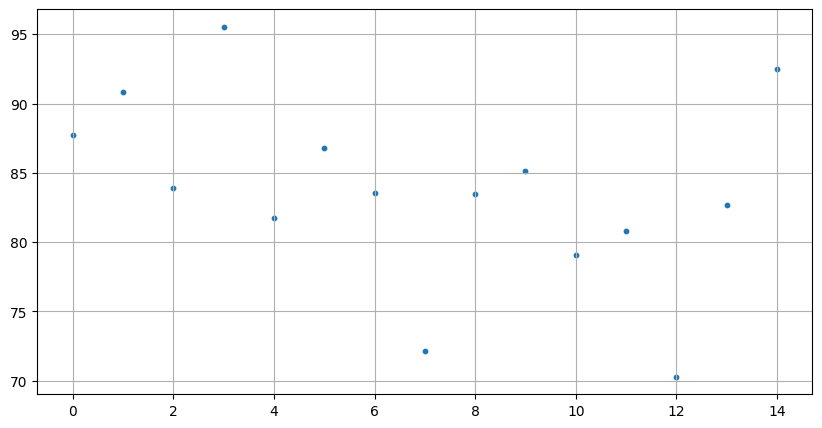

1.8975229295067861 83.74800182273512
28


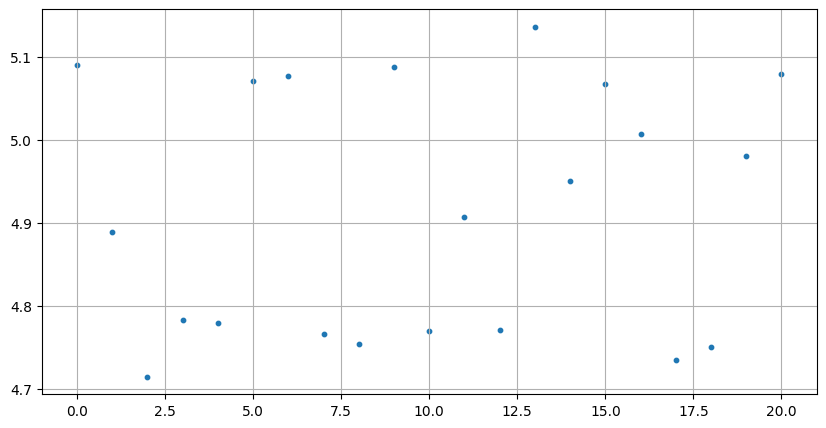

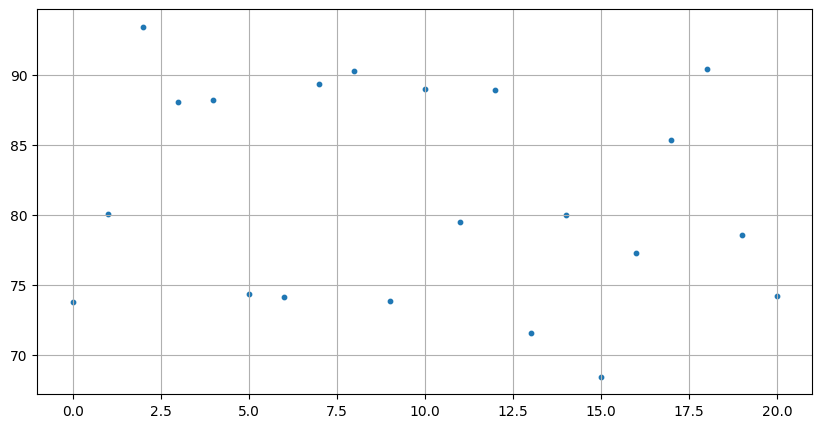

4.91276553795741 81.36931186435437
200


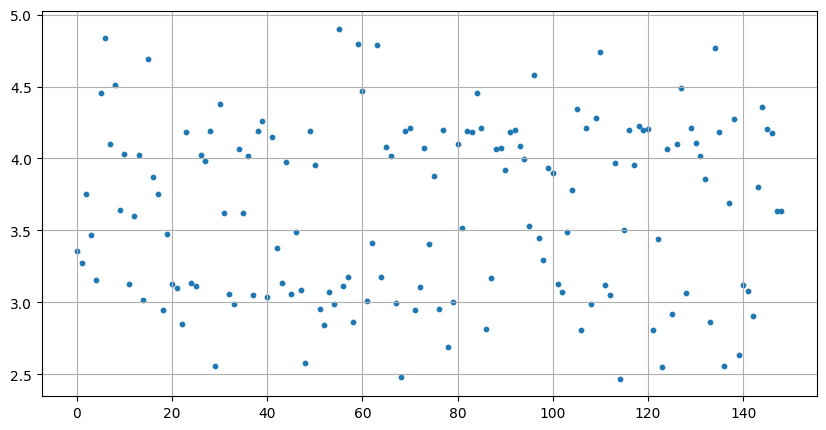

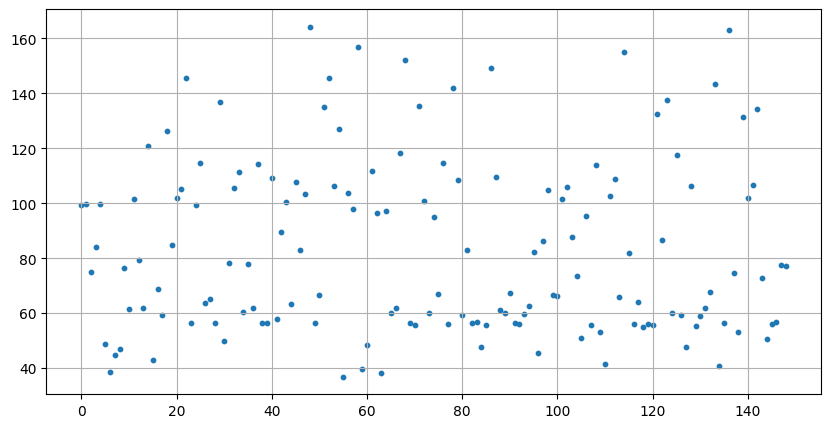

3.6475019022962165 83.42734953274946
45


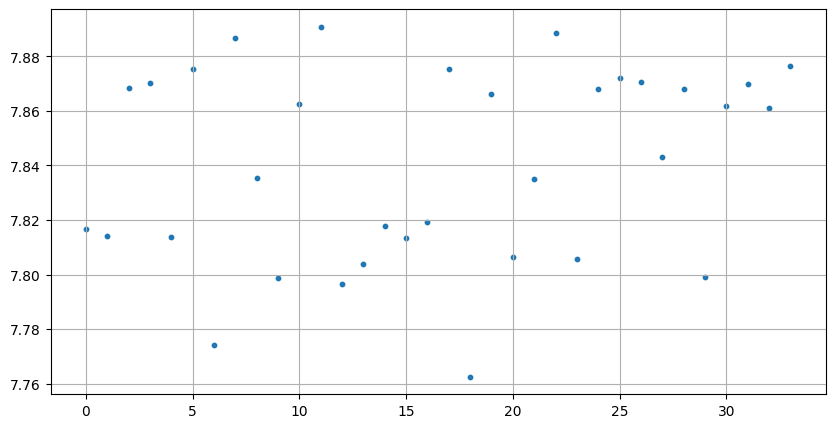

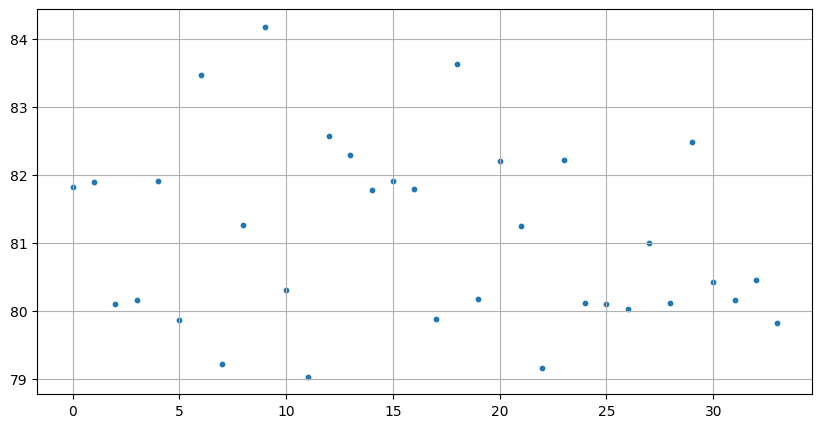

7.840817891332421 81.07917745429623
171



KeyboardInterrupt



In [67]:
plt.rcParams["figure.figsize"] = 10, 5
Q = Qнвг

b_list = []
for i in range(len(list_change) - 1):
    left = list_change[i]
    right = list_change[i + 1]
    list_combinations = list(combinations(range(left + 1, right + 1), 2)) 
    list_combinations = [list(x) for x in list_combinations]
    random.shuffle(list_combinations)
    list_solution_b = []
    n = 200
    N = min(n, len(list_combinations))
    print(N)
    for j in range(N):
         list_solution_b.append(solution_b(list_combinations[j], i))
    list_solution_b = np.array(list(filter(lambda item: item is not None, list_solution_b)))
    b_solution = pd.DataFrame(list_solution_b)
    b_solution = b_solution[(b_solution.iloc[:, 0] > 0)]
    b_solution['Cluster'] = IsolationForest(n_estimators=1000, contamination=0.25).fit_predict(standard(b_solution))
    b_solution = b_solution[b_solution['Cluster'] == 1]
    b_solution.pop('Cluster')
    plots(b_solution)
    b_list.append(b_solution.mean()[0])
    print(b_solution.mean()[0], b_solution.mean()[1])

[1.897522929507606, 4.912765537959454, 3.5522262325203537, 7.667373287952275, 11.240793210703096, 20.812132201257587, 20.699874635869858, 22.57960640929994, 21.479883333597186, 21.930302381171025, 9.64757863285435]


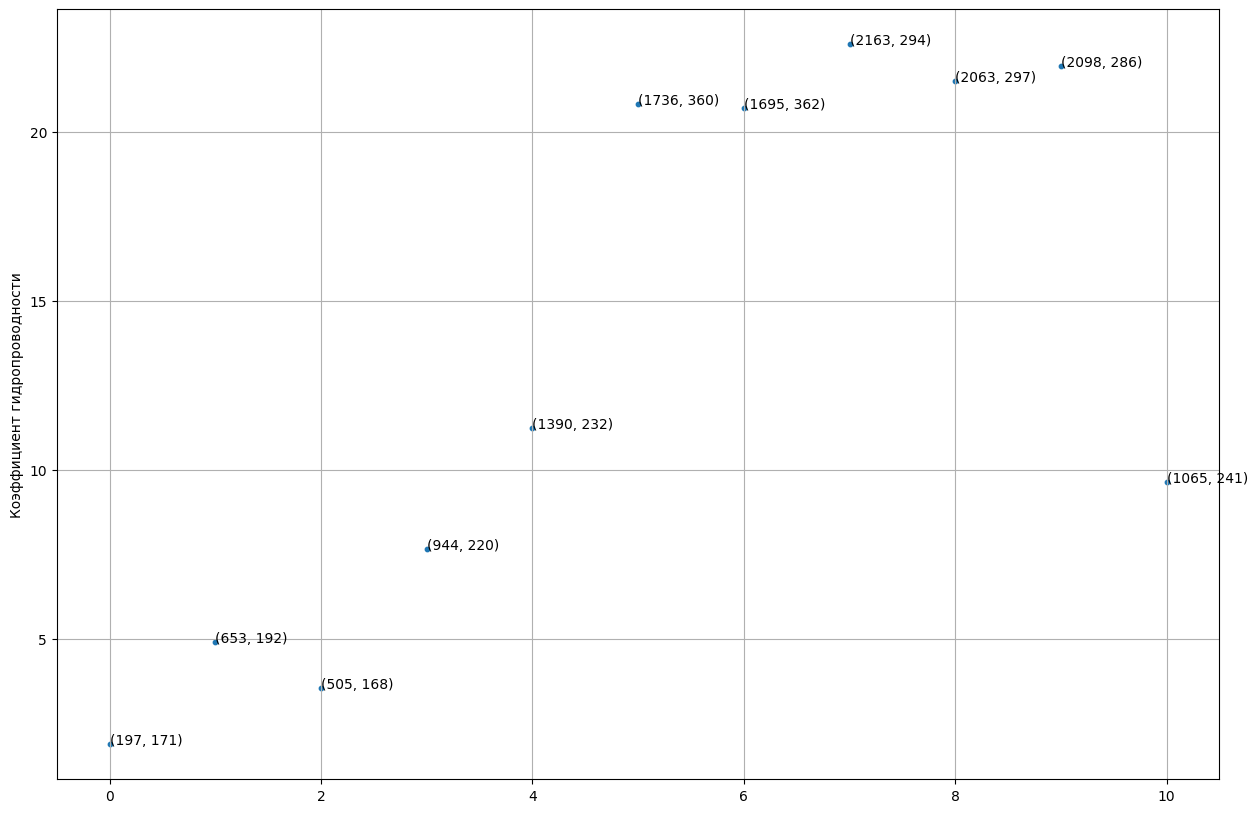

In [73]:
plt.rcParams["figure.figsize"] = 15, 10
b_list_1 = b_list.copy()
print(b_list_1)
k = list(range(len(b_list_1)))
gf_list_1 = [int(i) for i in gf_list]
qнв_list_1 = [int(i) for i in qнв_list]
q_list_1 = [int(i) for i in q_list]
plt.scatter(k, b_list_1, s=10)
plt.ylabel('Коэффициент гидропроводности')
plt.grid()
for i in range(len(b_list_1)):
    plt.annotate((gf_list_1[i], qнв_list_1[i]), (k[i], b_list_1[i]))

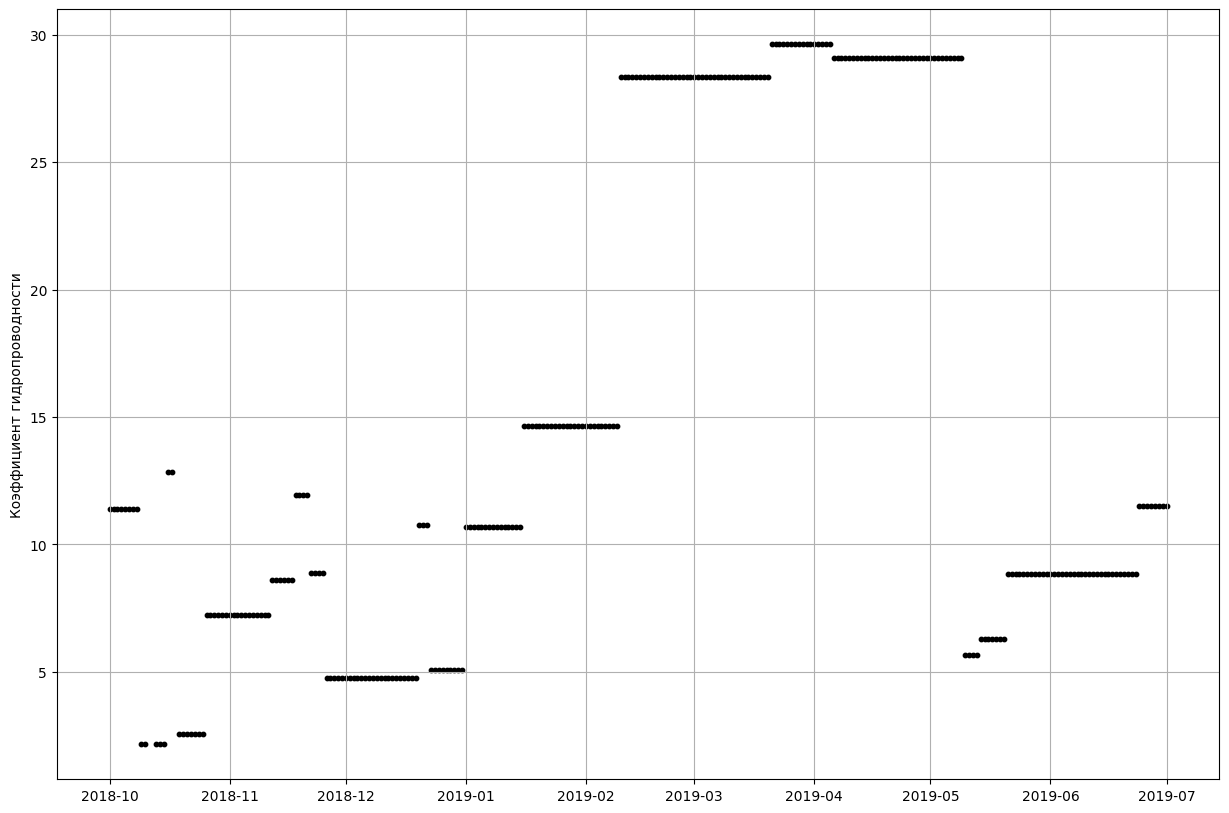

In [488]:
b_list_1_time = [b_list_1[i] for i in range(len(list_change) - 1) for j in range(list_change[i], list_change[i + 1])]
plt.scatter(df.index.tolist()[:-1], b_list_1_time, s=10, color='black')
plt.ylabel('Коэффициент гидропроводности')
plt.grid()

(0.0, 2000.0, 0.0, 35.0)

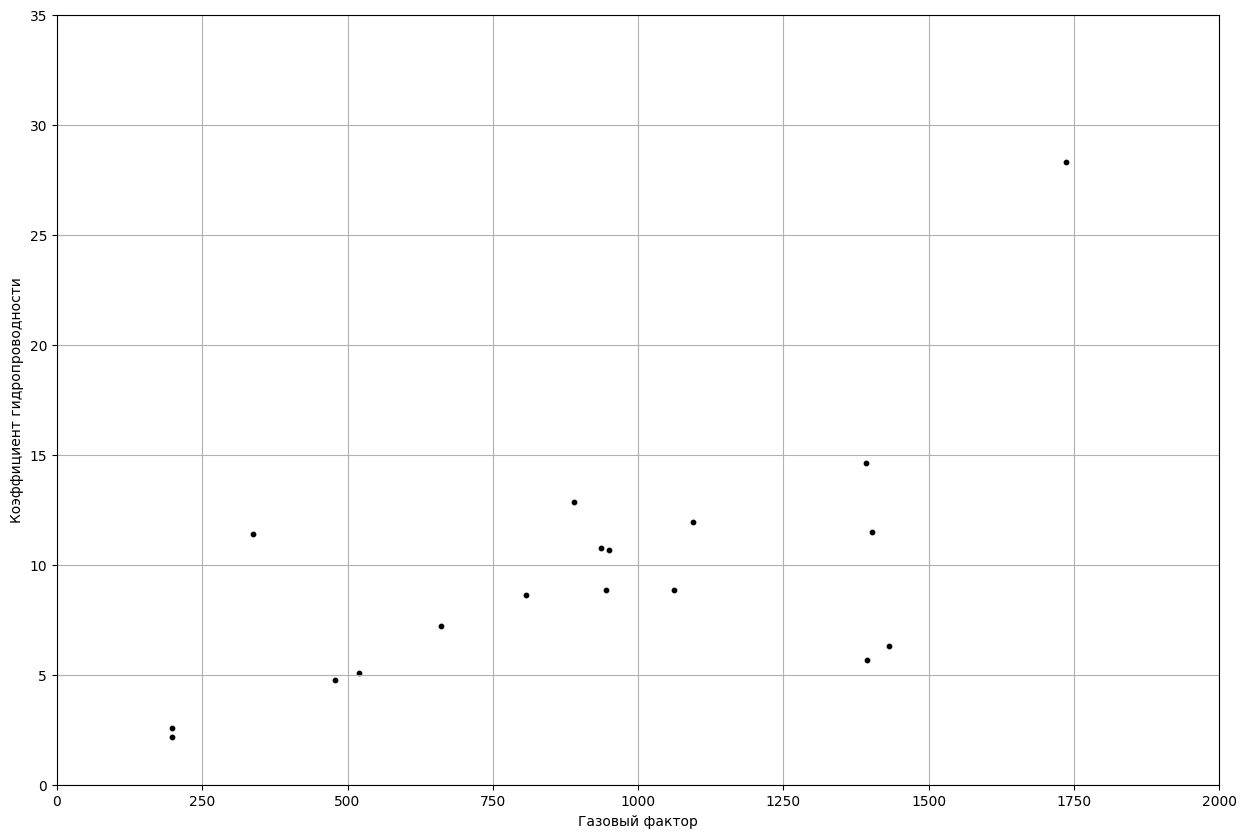

In [489]:
plt.scatter(gf_list, b_list_1, s=10, color='black')
plt.xlabel('Газовый фактор')
plt.ylabel('Коэффициент гидропроводности')
plt.grid()
plt.axis([0, 2000, 0, 35])

(0.0, 2000.0, 0.0, 35.0)

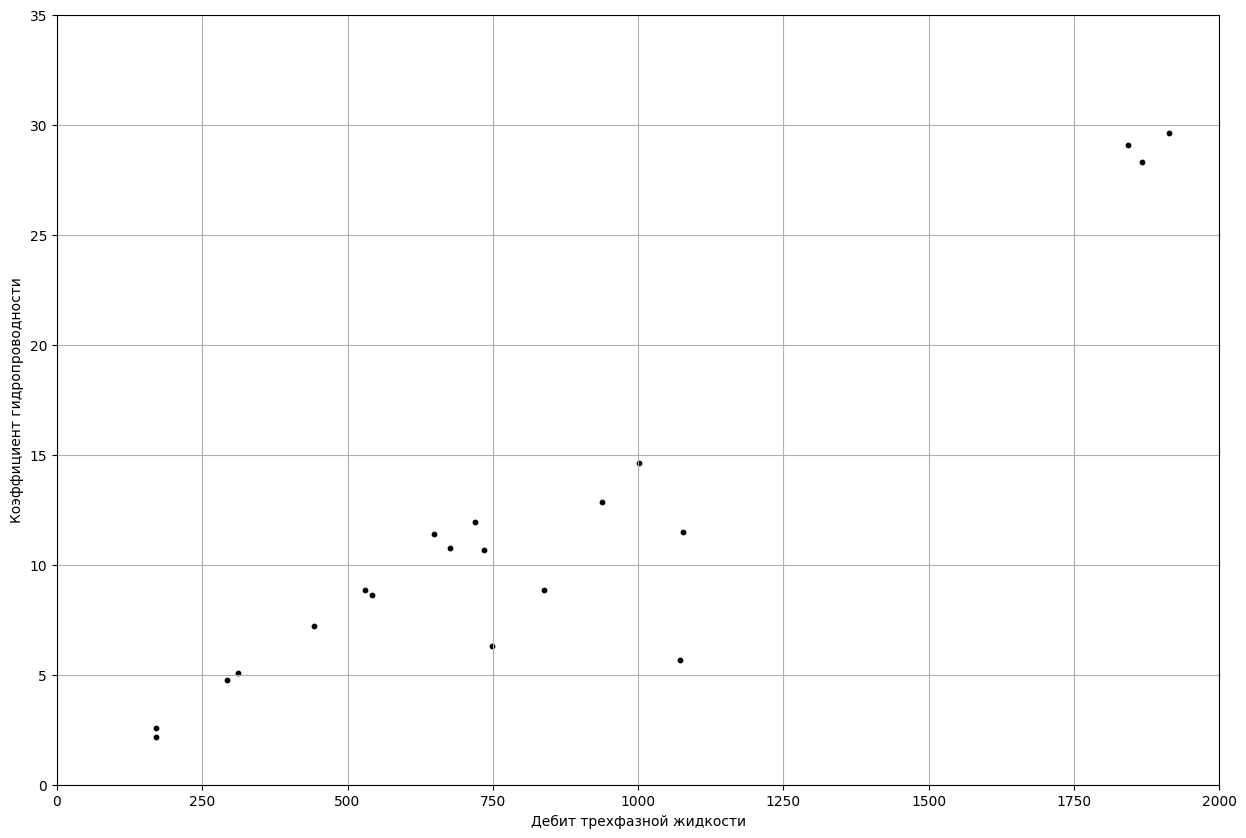

In [490]:
plt.scatter(q_list, b_list_1, s=10, color='black')
plt.xlabel('Дебит трехфазной жидкости')
plt.ylabel('Коэффициент гидропроводности')
plt.grid()
plt.axis([0, 2000, 0, 35])

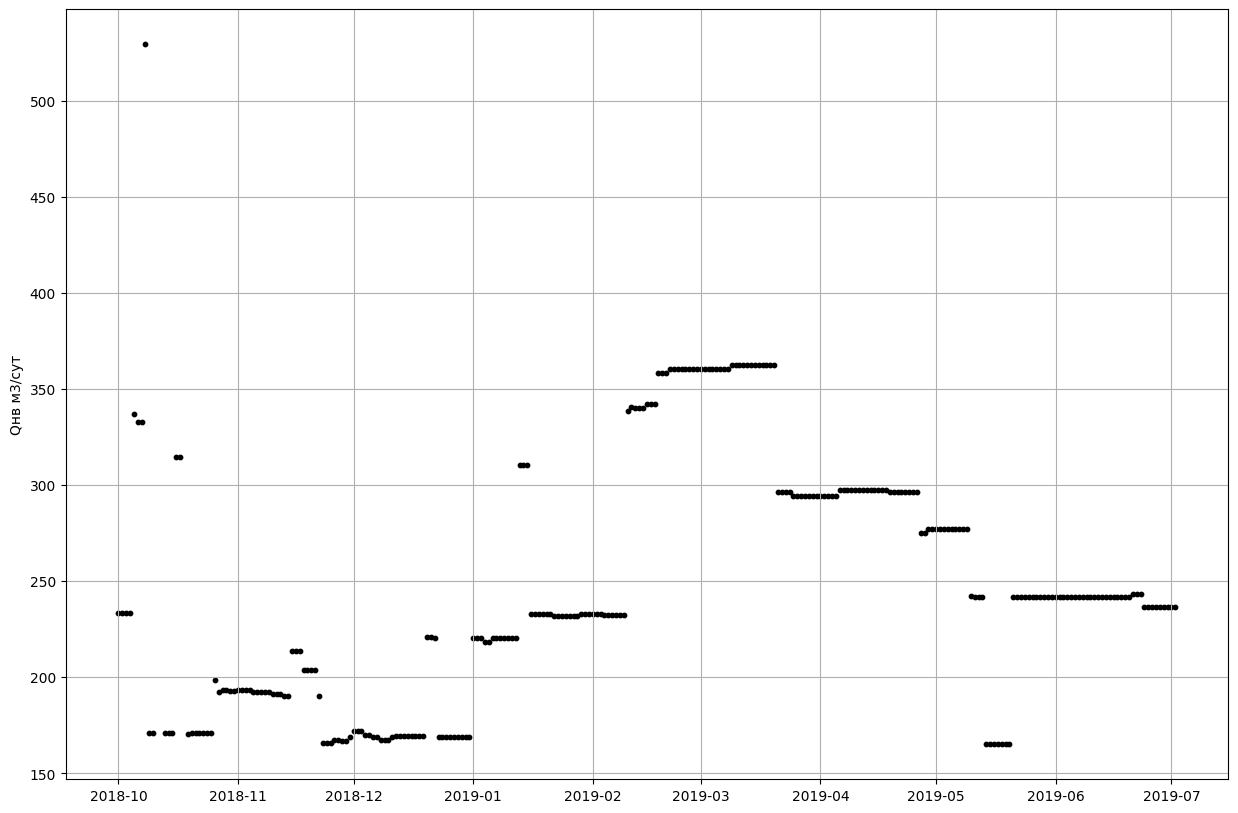

In [491]:
plt.scatter(date, Qнв, s=10, color='black')
plt.ylabel('Qнв м3/сут')
plt.grid()